I have used the fake news classification dataset from kaggle,click [here](https://www.kaggle.com/competitions/fake-news/data) to get the data

In [1]:
import pandas as pd

In [2]:
train_df = pd.read_csv("E:/fake-news/train.csv")

In [17]:
train_df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [3]:
train_df.shape

(20800, 5)

In [4]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer,HashingVectorizer

In [5]:
train_df = train_df.dropna()

In [6]:
messages = train_df.copy()
messages.reset_index(inplace = True)

In [7]:
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [9]:
ps = PorterStemmer()
corpus = []
for i in range(0,len(messages)):
    review = re.sub('[^a-zA-Z]',' ',messages['title'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 5000, ngram_range = (1,3))
X = cv.fit_transform(corpus).toarray()

In [13]:
X.shape

(18285, 5000)

In [11]:
y=messages['label']

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 1)


In [13]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()

In [14]:
from sklearn import metrics
import numpy as np
import itertools

In [15]:
classifier.fit(x_train,y_train)
pred = classifier.predict(x_test)
score = metrics.accuracy_score(y_test,pred)
print(score)

0.9022967553773241


True Positives (TP): 2153
False Positives (FP): 329
True Negatives (TN): 2797
False Negatives (FN): 207


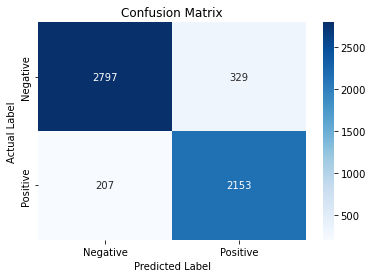

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

confusion_m = confusion_matrix(y_test, pred)

# Extract values
TN, FP, FN, TP = confusion_m.ravel()

print(f"True Positives (TP): {TP}")
print(f"False Positives (FP): {FP}")
print(f"True Negatives (TN): {TN}")
print(f"False Negatives (FN): {FN}")

sns.heatmap(confusion_m, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix")
plt.show()
